# AAAIM Evaluation Test

This notebook tests both single model evaluation and batch evaluation of multiple models.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import logging

# Add the project root to the Python path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

# Import AAAIM functions
from core import annotate_model, curate_model
from core.database_search import force_clear_chromadb, get_species_recommendations_rag
from utils.evaluation import (
    evaluate_single_model,
    evaluate_models_in_folder,
    print_evaluation_results,
    compare_results,
    process_saved_llm_responses
)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# LLM configuration
llm_model = "Llama-3.3-70B-Instruct"
# llm_model = "meta-llama/llama-3.3-70b-instruct:free"
# llm_model = "meta-llama/llama-3.3-70b-instruct"
# llm_model = "gpt-4.1-nano"

# Evaluation parameters
max_entities_per_model = 10  # Limit entities per model for testing
num_models_to_test = 5  # Number of models to test in batch evaluation

# Entity and database configuration
entity_type = "chemical"
database = "chebi"

output_dir = "./results/"  # Output directory for results

### Test function

In [2]:
# Test data - typical chemical species with synonyms
species_ids = ["glucose", "caffeine", "aspirin"]
synonyms_dict = {
    "glucose": ["glucose", "dextrose", "D-glucose"],
    "caffeine": ["caffeine", "1,3,7-trimethylxanthine"],
    "aspirin": ["aspirin", "acetylsalicylic acid", "ASA"]
}

print("Testing RAG-based entity linking...")
print("="*50)

try:
    # Test RAG approach
    rag_recommendations = get_species_recommendations_rag(
        species_ids=species_ids,
        synonyms_dict=synonyms_dict,
        model_type="default",
        top_k=3
    )
    
    for rec in rag_recommendations:
        print(f"\nSpecies: {rec.id}")
        print(f"Synonyms: {rec.synonyms}")
        print(f"Candidates: {rec.candidates}")
        print(f"Names: {rec.candidate_names}")
        print(f"Match scores (similarity): {rec.match_score}")
        
except Exception as e:
    print(f"RAG search failed: {e}")

Testing RAG-based entity linking...
INFO Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
INFO Using sentence transformer all-MiniLM-L6-v2 model
INFO Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO Using RAG embeddings from collection 'chebi_default_numonly' with default model


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Species: glucose
Synonyms: ['glucose', 'dextrose', 'D-glucose']
Candidates: ['4167', '42758', '17234']
Names: ['glucose', 'glucose', 'glucose']
Match scores (similarity): [1.0, 1.0, 1.0]

Species: caffeine
Synonyms: ['caffeine', '1,3,7-trimethylxanthine']
Candidates: ['27732', '17395', '18123']
Names: ['caffeine', 'caffeate', 'caffearine']
Match scores (similarity): [1.0, 0.745, 0.687]

Species: aspirin
Synonyms: ['aspirin', 'acetylsalicylic acid', 'ASA']
Candidates: ['15365', '182973', '233566']
Names: ['aspirin', 'no-aspirin', 'aspirin softam']
Match scores (similarity): [1.0, 0.856, 0.716]


## Annotating a new model with no or few existing annotations

In [3]:
test_model_file = "190_few_anno.xml"
# Check if test model exists
if os.path.exists(test_model_file):
    print(f"✓ Test model found: {test_model_file}")
else:
    print(f"✗ Test model not found: {test_model_file}")

✓ Test model found: 190_few_anno.xml


In [4]:
# Test with a single model
recommendations_df, metrics = annotate_model(
    model_file=test_model_file,
    llm_model=llm_model,
    method="rag",
    max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database
)

INFO Starting annotation for model: 190_few_anno.xml
INFO Using LLM model: Llama-3.3-70B-Instruct
INFO Using method: rag for database search
INFO Entity type: chemical, Database: chebi
INFO >>>Step 1: Getting species from model...<<<
INFO Found 11 species in model
INFO Found 2 entities with existing annotations
INFO Selected 10 entities for annotation
INFO >>>Step 2: Extracting model context...<<<
INFO Extracted context for model: Rodriguez-Caso2006_Polyamine_Metabolism
INFO >>>Step 3: Querying LLM (Llama-3.3-70B-Instruct)...<<<
INFO HTTP Request: POST https://api.llama.com/compat/v1/chat/completions "HTTP/1.1 200 OK"
INFO LLM response received in 3.34s
INFO Parsed synonyms for 10 entities
INFO >>>Step 4: Searching chebi database...<<<


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO Database search completed in 0.71s
INFO >>>Step 5: Generating recommendation table...<<<
INFO Annotation completed in 4.19s
INFO Generated 50 recommendations


In [5]:
recommendations_df

,file,type,id,display_name,annotation,annotation_label,match_score,existing,update_annotation
0,190_few_anno.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:15414,s-adenosylmethionine,1.000,1,keep
1,190_few_anno.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:67040,s-adenosylmethionine,1.000,0,ignore
2,190_few_anno.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:33442,s-adenosylmethionine,1.000,0,ignore
3,190_few_anno.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:15625,s-adenosylmethioninamine,0.926,0,ignore
4,190_few_anno.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:57443,s-adenosylmethioninaminium,0.807,0,ignore
5,190_few_anno.xml,chemical,A,S-adenosylmethioninamine,CHEBI:15625,s-adenosylmethioninamine,1.000,1,keep
6,190_few_anno.xml,chemical,A,S-adenosylmethioninamine,CHEBI:33442,s-adenosylmethionine,0.926,0,ignore
7,190_few_anno.xml,chemical,A,S-adenosylmethioninamine,CHEBI:15414,s-adenosylmethionine,0.926,0,ignore
8,190_few_anno.xml,chemical,A,S-adenosylmethioninamine,CHEBI:67040,s-adenosylmethionine,0.926,0,ignore
9,190_few_anno.xml,chemical,A,S-adenosylmethioninamine,CHEBI:57443,s-adenosylmethioninaminium,0.907,0,ignore


In [6]:
metrics

{'total_entities': 11,
 'entities_with_predictions': 10,
 'annotation_rate': 0.9090909090909091,
 'total_predictions': 50,
 'matches': 2,
 'accuracy': 1.0,
 'total_time': 4.194497108459473,
 'llm_time': 3.3385448455810547,
 'search_time': 0.7138900756835938}

## Curate a model with existing annotations

Evaluation of a single model with existing annotations. 
Will only look at the species with existing annotations.

In [2]:
test_model_file = "test_models/BIOMD0000000190.xml"
# Check if test model exists
if os.path.exists(test_model_file):
    print(f"✓ Test model found: {test_model_file}")
else:
    print(f"✗ Test model not found: {test_model_file}")

✓ Test model found: test_models/BIOMD0000000190.xml


In [3]:
# Test with a single model
recommendations_df, metrics = curate_model(
    model_file=test_model_file,
    llm_model=llm_model,
    method="rag",
    max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database
)

INFO Starting curation for model: test_models/BIOMD0000000190.xml
INFO Using LLM model: Llama-3.3-70B-Instruct
INFO Using method: rag for database search
INFO Entity type: chemical, Database: chebi
INFO >>>Step 1: Finding existing annotations...<<<
INFO Found 11 entities with existing annotations
INFO Selected 10 entities for curation
INFO >>>Step 2: Extracting model context...<<<
INFO Extracted context for model: Rodriguez-Caso2006_Polyamine_Metabolism
INFO >>>Step 3: Querying LLM ({llm_model})...<<<
INFO HTTP Request: POST https://api.llama.com/compat/v1/chat/completions "HTTP/1.1 200 OK"
INFO LLM response received in 3.98s
INFO Parsed synonyms for 10 entities
INFO >>>Step 4: Searching chebi database...<<<
INFO Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
INFO Using sentence transformer all-MiniLM-L6-v2 model
INFO Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO Using RAG embeddings from collection 'chebi_d

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO Database search completed in 6.65s
INFO >>>Step 5: Generating recommendation table...<<<
INFO Curation completed in 10.74s
INFO Generated 50 recommendations


In [4]:
metrics

{'total_entities': 11,
 'entities_with_predictions': 10,
 'annotation_rate': 0.9090909090909091,
 'total_predictions': 50,
 'matches': 9,
 'accuracy': 0.9,
 'total_time': 10.740984678268433,
 'llm_time': 3.9774041175842285,
 'search_time': 6.647316932678223}

In [5]:
recommendations_df

,file,type,id,display_name,annotation,annotation_label,match_score,existing,update_annotation
0,BIOMD0000000190.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:15414,s-adenosylmethionine,1.000,1,keep
1,BIOMD0000000190.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:67040,s-adenosylmethionine,1.000,0,ignore
2,BIOMD0000000190.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:33442,s-adenosylmethionine,1.000,0,ignore
3,BIOMD0000000190.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:15625,s-adenosylmethioninamine,0.926,0,ignore
4,BIOMD0000000190.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:57443,s-adenosylmethioninaminium,0.807,0,ignore
5,BIOMD0000000190.xml,chemical,A,S-adenosylmethioninamine,CHEBI:15625,decarboxylated s-adenosylmethionine,1.000,1,keep
6,BIOMD0000000190.xml,chemical,A,S-adenosylmethioninamine,CHEBI:67040,decarboxylated s-adenosylmethionine(2+),0.926,0,ignore
7,BIOMD0000000190.xml,chemical,A,S-adenosylmethioninamine,CHEBI:33442,s-adenosylmethionine decarboxylase inhibitor,0.926,0,ignore
8,BIOMD0000000190.xml,chemical,A,S-adenosylmethioninamine,CHEBI:15414,s-adenosylmethionine,0.926,0,ignore
9,BIOMD0000000190.xml,chemical,A,S-adenosylmethioninamine,CHEBI:57443,s-adenosylmethionine,0.907,0,ignore


## Test 1: Single Model Evaluation

Evaluation of a single model with existing annotations.

In [6]:
# Test using utils evaluation function
test_model_file = "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioModels/BIOMD0000000013.xml"
result_df = evaluate_single_model(
    model_file=test_model_file,
    llm_model=llm_model,
    method = 'rag',
    max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database,
    save_llm_results=False,
    verbose=True
)

INFO Evaluating model: BIOMD0000000013.xml


INFO Evaluating 10 entities in BIOMD0000000013.xml
INFO HTTP Request: POST https://api.llama.com/compat/v1/chat/completions "HTTP/1.1 200 OK"


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
result_df

,model,species_id,display_name,synonyms_LLM,reason,exist_annotation_id,exist_annotation_name,predictions,predictions_names,match_score,recall_formula,precision_formula,recall_exact,precision_exact,accuracy,total_time,llm_time,query_time,tax_id,tax_name
0,BIOMD0000000013.xml,x_CO2,carbon dioxide,"[carbon dioxide, CO2, carbonic acid]",The species names were matched to their corres...,[16526],carbon dioxide,"[16526, 28976, 29325, 48828, 36964]","[carbon dioxide, carbonic acid, oxidooxomethyl...","[1.0, 1.0, 0.81, 0.803, 0.738]",1.0,0.250,1.0,0.2,1,3.620765,2.951901,0.668864,None,None
1,BIOMD0000000013.xml,ATP_ch,adenosine triphosphate,"[adenosine triphosphate, ATP, adenosine 5'-tri...",The species names were matched to their corres...,[15422],ATP,"[15422, 30616, 62910, 27775, 57299]","[ATP, ATP(4-), ethyl-ATP, P(1),P(3)-bis(5'-ade...","[1.0, 1.0, 0.865, 0.923, 0.737]",1.0,0.333,1.0,0.2,1,3.620765,2.951901,0.668864,None,None
2,BIOMD0000000013.xml,x_NADPH_ch,nicotinamide adenine dinucleotide phosphate,"[nicotinamide adenine dinucleotide phosphate, ...",The species names were matched to their corres...,[16474],NADPH,"[18009, 16474, 57783, 25523, 16908]","[NADP(+), NADPH, NADPH(4-), NADP, NADH]","[1.0, 1.0, 1.0, 0.988, 0.899]",1.0,0.500,1.0,0.2,1,3.620765,2.951901,0.668864,None,None
3,BIOMD0000000013.xml,GAP_ch,glyceraldehyde 3-phosphate,"[glyceraldehyde 3-phosphate, G3P, glyceraldehy...",The species names were matched to their corres...,[17138],glyceraldehyde 3-phosphate,"[29052, 17138, 58027, 89636, 28424]","[D-glyceraldehyde 3-phosphate, glyceraldehyde ...","[1.0, 1.0, 1.0, 0.564, 0.564]",1.0,0.333,1.0,0.2,1,3.620765,2.951901,0.668864,None,None
4,BIOMD0000000013.xml,Pi_ch,phosphate,"[phosphate, inorganic phosphate, orthophosphate]",The species names were matched to their corres...,[18367],phosphate(3-),"[18367, 26020, 26078, 35780, 43474]","[phosphate(3-), phosphate, phosphoric acid, ph...","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.000,1.0,0.2,1,3.620765,2.951901,0.668864,None,None
5,BIOMD0000000013.xml,DHAP_ch,dihydroxyacetone phosphate,"[dihydroxyacetone phosphate, DHAP, glycerone p...",The species names were matched to their corres...,[16108],dihydroxyacetone phosphate,"[16108, 57642, 24356, 26707, 173905]","[dihydroxyacetone phosphate, glycerone phospha...","[1.0, 1.0, 0.926, 0.914, 0.891]",1.0,0.500,1.0,0.2,1,3.620765,2.951901,0.668864,None,None
6,BIOMD0000000013.xml,FBP_ch,"fructose 1,6-bisphosphate","[fructose 1,6-bisphosphate, FBP, fructose-1,6-...",The species names were matched to their corres...,[28013],"beta-D-fructofuranose 1,6-bisphosphate","[16905, 78682, 49299, 28602, 189411]","[keto-D-fructose 1,6-bisphosphate, D-fructose ...","[0.883, 0.883, 0.883, 0.84, 0.564]",1.0,0.500,0.0,0.0,1,3.620765,2.951901,0.668864,None,None
7,BIOMD0000000013.xml,F6P_ch,fructose 6-phosphate,"[fructose 6-phosphate, F6P, fructose-6-phosphate]",The species names were matched to their corres...,[57634],beta-D-fructofuranose 6-phosphate(2-),"[88003, 16084, 15946, 61437, 61527]","[fructose 6-phosphate, beta-D-fructofuranose 6...","[1.0, 1.0, 1.0, 0.899, 0.84]",1.0,0.500,0.0,0.0,1,3.620765,2.951901,0.668864,None,None
8,BIOMD0000000013.xml,E4P_ch,erythrose 4-phosphate,"[erythrose 4-phosphate, E4P, erythrose-4-phosp...",The species names were matched to their corres...,[48153],D-erythrose 4-phosphate,"[4116, 23956, 16897, 48153, 193565]","[D-erythrulose 4-phosphate, erythrose phosphat...","[0.846, 0.829, 0.784, 0.784, 0.442]",1.0,0.500,1.0,0.2,1,3.620765,2.951901,0.668864,None,None
9,BIOMD0000000013.xml,X5P_ch,xylulose 5-phosphate,"[xylulose 5-phosphate, X5P, xylulose-5-phosphate]",The species names were matched to their corres...,[16332],D-xylulose 5-phosphate,"[27354, 16593, 57829, 16332, 57737]","[xylulose 5-phosphate, L-xylulose 5-phosphate,...","[1.0, 0.866, 0.866, 0.824, 0.808]",1.0,1.000,1.0,0.2,1,3.620765,2.951901,0.668864,None,None


## Test 2: Batch Model Evaluation

Test the evaluation of multiple models in a directory.

In [3]:
model_dir = "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioModels"
# model_dir = "test_models"
# Check if model directory exists
if os.path.exists(model_dir):
    model_files = [f for f in os.listdir(model_dir) if f.endswith('.xml')]
    print(f"✓ Model directory found: {model_dir}")
    print(f"  - Found {len(model_files)} XML files")
    # print(f"  - Will test first {min(num_models_to_test, len(model_files))} models")

✓ Model directory found: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioModels
  - Found 1063 XML files


In [ ]:
# Run batch evaluation 
batch_results_df = evaluate_models_in_folder(
    model_dir=model_dir,
    # num_models=min(num_models_to_test, len(model_files)),
    llm_model=llm_model,
    method="rag",
    # max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database,
    save_llm_results=True,
    output_dir=output_dir,
    output_file="biomd_chebi_rag_meta-llama_default.csv",
    start_at=1,
    verbose=False
)

## Test 3: Evaluating previous LLM sysnonyms

In [5]:
results_df = process_saved_llm_responses(response_folder = '/Users/luna/Desktop/CRBM/AMAS_proj/AAAIM/tests/results/Llama-3.3-70B-instruct-Meta/chemical', 
                               model_dir = '/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioModels', 
                               prev_results_csv = 'results/biomd_chebi_rag_meta-llama_default.csv', 
                               method = "rag",
                               output_dir = './results/', 
                               output_file = 'biomd_chebi_rag_meta-llama_top10.csv',
                               top_k = 10,
                               verbose = False)

Processing 1/340: BIOMD0000000291.txt
Processing 2/340: BIOMD0000000246.txt
Processing 3/340: BIOMD0000000508.txt
Processing 4/340: BIOMD0000000087.txt
Processing 5/340: BIOMD0000000736.txt
Processing 6/340: BIOMD0000000050.txt
Processing 7/340: BIOMD0000000044.txt
Processing 8/340: BIOMD0000000859.txt
Processing 9/340: BIOMD0000000642.txt
Processing 10/340: BIOMD0000000124.txt
Processing 11/340: BIOMD0000000497.txt
Processing 12/340: BIOMD0000000326.txt
Processing 13/340: BIOMD0000000468.txt
Processing 14/340: BIOMD0000000469.txt
Processing 15/340: BIOMD0000001005.txt
Processing 16/340: BIOMD0000000327.txt
Processing 17/340: BIOMD0000000496.txt
Processing 18/340: BIOMD0000000482.txt
Processing 19/340: BIOMD0000000119.txt
Processing 20/340: BIOMD0000000858.txt
Processing 21/340: BIOMD0000000045.txt
Processing 22/340: BIOMD0000000737.txt
Processing 23/340: BIOMD0000000051.txt
Processing 24/340: BIOMD0000000086.txt
Processing 25/340: BIOMD0000000509.txt
Processing 26/340: BIOMD0000000521

## Statistics

In [2]:
print_evaluation_results('results/biomd_chebi_direct_llama_plain_nosymbols.csv') 

Number of models assessed: 315
Number of models with predictions: 309
Average accuracy (per model): 0.82
Ave. recall (formula): 0.82
Ave. precision (formula): 0.74
Ave. recall (exact): 0.76
Ave. precision (exact): 0.35
Average accuracy (per species): 0.28
Ave. recall (formula, per species): 0.28
Ave. precision (formula, per species): 0.25
Ave. recall (exact, per species): 0.24
Ave. precision (exact, per species): 0.11
Ave. total time (per model): 17.51
Ave. total time (per element, per model): 0.57
Ave. LLM time (per model): 16.42
Ave. LLM time (per element, per model): 0.54
Average number of predictions per species: 1.14


In [3]:
print_evaluation_results('results/biomd_chebi_rag_llama_default.csv')

Number of models assessed: 340
Number of models with predictions: 338
Average accuracy (per model): 0.78
Ave. recall (formula): 0.78
Ave. precision (formula): 0.45
Ave. recall (exact): 0.72
Ave. precision (exact): 0.15
Average accuracy (per species): 0.46
Ave. recall (formula, per species): 0.45
Ave. precision (formula, per species): 0.24
Ave. recall (exact, per species): 0.35
Ave. precision (exact, per species): 0.09
Ave. total time (per model): 24.09
Ave. total time (per element, per model): 0.76
Ave. LLM time (per model): 23.44
Ave. LLM time (per element, per model): 0.74
Average number of predictions per species: 4.64


In [6]:
print_evaluation_results('results/biomd_chebi_rag_meta-llama_default.csv')

Number of models assessed: 340
Number of models with predictions: 339
Average accuracy (per model): 0.77
Ave. recall (formula): 0.77
Ave. precision (formula): 0.43
Ave. recall (exact): 0.00
Ave. precision (exact): 0.00
Ave. total time (per model): 4.82
Ave. total time (per element, per model): 0.15
Ave. LLM time (per model): 4.27
Ave. LLM time (per element, per model): 0.13
Average number of predictions per species: 4.67


In [3]:
print_evaluation_results('results/biomd_chebi_rag_meta-llama_top3.csv')

Number of models assessed: 340
Number of models with predictions: 340
Average accuracy (per model): 0.74
Ave. recall (formula): 0.73
Ave. precision (formula): 0.54
Ave. recall (exact): 0.59
Ave. precision (exact): 0.20
Ave. total time (per model): 4.75
Ave. total time (per element, per model): 0.15
Ave. LLM time (per model): 4.27
Ave. LLM time (per element, per model): 0.13
Average number of predictions per species: 2.91


In [5]:
print_evaluation_results('results/biomd_chebi_rag_gpt-4.1-nano_default.csv')

Number of models assessed: 340
Number of models with predictions: 334
Average accuracy (per model): 0.74
Ave. recall (formula): 0.74
Ave. precision (formula): 0.42
Ave. recall (exact): 0.66
Ave. precision (exact): 0.14
Ave. total time (per model): 6.19
Ave. total time (per element, per model): 0.20
Ave. LLM time (per model): 5.60
Ave. LLM time (per element, per model): 0.18
Average number of predictions per species: 4.81


In [4]:
compare_results('results/biomd_chebi_direct_llama_plain_nosymbols.csv','results/biomd_chebi_direct_meta-llama_nosymbols.csv', 'results/biomd_chebi_rag_meta-llama_default.csv','results/biomd_chebi_rag_meta-llama_top3.csv','results/biomd_chebi_rag_gpt-4.1-nano_default.csv')

COMPARISON OF RESULTS (filtered to common models/species)

RESULTS FOR: results/biomd_chebi_direct_llama_plain_nosymbols.csv
Number of models assessed: 315
Number of models with predictions: 309
Number of species tested: 6075
Average accuracy (per model): 0.82
Average recall (formula) (per model): 0.82
Average precision (formula) (per model): 0.74
Average recall (exact) (per model): 0.76
Average precision (exact) (per model): 0.35
Ave. total time (per model): 17.51
Ave. total time (per element, per model): 0.57
Ave. LLM time (per model): 16.42
Ave. LLM time (per element, per model): 0.54
Average number of predictions per species: 1.14

RESULTS FOR: results/biomd_chebi_direct_meta-llama_nosymbols.csv
Number of models assessed: 315
Number of models with predictions: 309
Number of species tested: 6075
Average accuracy (per model): 0.82
Average recall (formula) (per model): 0.82
Average precision (formula) (per model): 0.71
Average recall (exact) (per model): 0.00
Average precision (exact)

In [6]:
compare_results('results/biomd_chebi_direct_llama_plain_nosymbols.csv','results/biomd_chebi_rag_meta-llama_top10.csv','results/biomd_chebi_rag_meta-llama_default.csv','results/biomd_chebi_rag_meta-llama_top3.csv')

COMPARISON OF RESULTS (filtered to common models/species)

RESULTS FOR: results/biomd_chebi_direct_llama_plain_nosymbols.csv
Number of models assessed: 315
Number of models with predictions: 309
Number of species tested: 6075
Average accuracy (per model): 0.82
Average recall (formula) (per model): 0.82
Average precision (formula) (per model): 0.74
Average recall (exact) (per model): 0.76
Average precision (exact) (per model): 0.35
Ave. total time (per model): 17.51
Ave. total time (per element, per model): 0.57
Ave. LLM time (per model): 16.42
Ave. LLM time (per element, per model): 0.54
Average number of predictions per species: 1.14

RESULTS FOR: results/biomd_chebi_rag_meta-llama_top10.csv
Number of models assessed: 315
Number of models with predictions: 315
Number of species tested: 6075
Average accuracy (per model): 0.86
Average recall (formula) (per model): 0.86
Average precision (formula) (per model): 0.20
Average recall (exact) (per model): 0.79
Average precision (exact) (per m

In [9]:
gpt_df_filtered.to_csv('results/biomd_chebi_rag_gpt-4.1-nano_default_filtered.csv', index=False)

In [7]:
prev_df = pd.read_csv('results/biomd_chebi_rag_llama_default.csv')
prev_models = set(prev_df['model'].unique())
new_models = set(batch_results_df['model'].unique())
new_models = new_models - prev_models
new_models

{'BIOMD0000000019.xml',
 'BIOMD0000000049.xml',
 'BIOMD0000000072.xml',
 'BIOMD0000000164.xml',
 'BIOMD0000000174.xml',
 'BIOMD0000000201.xml',
 'BIOMD0000000264.xml',
 'BIOMD0000000338.xml',
 'BIOMD0000000339.xml',
 'BIOMD0000000340.xml',
 'BIOMD0000000344.xml',
 'BIOMD0000000399.xml',
 'BIOMD0000000452.xml',
 'BIOMD0000000453.xml',
 'BIOMD0000000466.xml',
 'BIOMD0000000521.xml',
 'BIOMD0000000617.xml',
 'BIOMD0000000637.xml',
 'BIOMD0000000638.xml',
 'BIOMD0000000699.xml',
 'BIOMD0000000701.xml',
 'BIOMD0000000702.xml',
 'BIOMD0000000826.xml',
 'BIOMD0000000927.xml',
 'BIOMD0000000932.xml'}

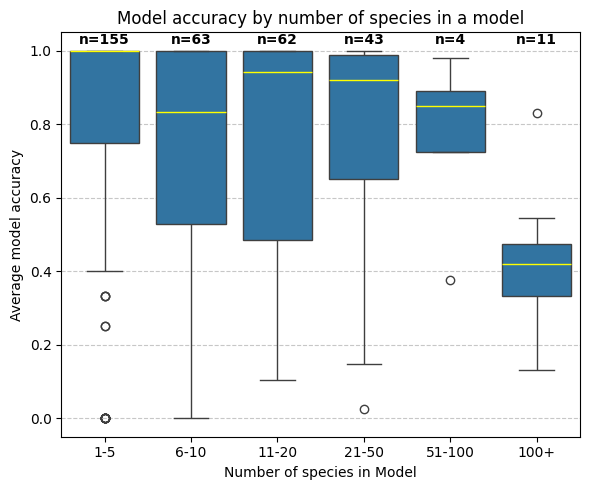

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
results_llama = pd.read_csv('results/biomd_chebi_rag_meta-llama_default.csv')
# Group models by number of species and calculate accuracy statistics
model_species_count = results_llama.groupby('model').size().reset_index(name='species_count')
model_accuracy = results_llama.groupby('model')['accuracy'].mean().reset_index()

# Merge the two dataframes
model_stats = pd.merge(model_species_count, model_accuracy, on='model')

# Create bins for species count to make the box plot more readable
bins = [0, 5, 10, 20, 50, 100, 1000]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '100+']
model_stats['species_count_bin'] = pd.cut(model_stats['species_count'], bins=bins, labels=labels)

# Count number of models in each bin
bin_counts = model_stats['species_count_bin'].value_counts().reindex(labels, fill_value=0)

# Create the box plot
plt.figure(figsize=(6, 5))
ax = sns.boxplot(x='species_count_bin', y='accuracy', data=model_stats, medianprops={"color": "yellow", "linewidth": 1})

# Add counts above each box
for i, label in enumerate(labels):
    count = bin_counts[label]
    ax.text(i, 1.01, f'n={count}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title('Model accuracy by number of species in a model')
plt.xlabel('Number of species in Model')
plt.ylabel('Average model accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig(os.path.join(output_dir, 'accuracy_by_species_count.png'), dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# fix display name handling
ref_df = pd.read_csv('/Users/luna/Desktop/CRBM/AMAS_proj/Results/biomd_species_accuracy_AMAS.csv')
df = pd.read_csv('/Users/luna/Desktop/CRBM/AMAS_proj/AAAIM/tests/results/biomd_chebi_rag_meta-llama_default.csv')

# Replace 'display_name' in df with 'species_name' from ref_df using 'model' and 'species_id' as keys
df = df.merge(ref_df[['model', 'species_id', 'species_name']], on=['model', 'species_id'], how='left', suffixes=('', '_ref'))
df['display_name'] = df['species_name']
df = df.drop(columns=['species_name'])
df.to_csv('/Users/luna/Desktop/CRBM/AMAS_proj/AAAIM/tests/results/biomd_chebi_rag_meta-llama_default_display_names.csv', index=False)